# 용역발주계획내역_2017, 용역입찰공고내역_2017

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
#용역발주계획내역
order_plan = pd.read_excel("C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/EDA/용역+발주계획+내역(00008)_20220201131912_2017.xlsx")

C:\Users\yjhon\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
#용역입찰공고내역
order_notice = pd.read_excel("C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/EDA/용역+입찰공고+내역(00027)_20220201131828_2017.xlsx")

In [164]:
order_plan.columns

Index(['용역구분', '조달구분', '게시일자', '발주계획통합번호', '수요기관명', '수요기관구분', '수요기관지역명',
       '수요기관코드', '발주시기', '발주금액', '용역명', '계약방법', '협정여부', '업무유형', '수의계약사유',
       '발주번호', '발주기관부서명', '발주기관담당자명', '발주기관담당자전화번호'],
      dtype='object')

In [163]:
#order_notice

In [162]:
order_notice.columns
order_notice.입찰계약방법.unique()

array(['제한(총액)협상에의한계약', '제한(총액)', '소액수의(견적입찰)', '수의(총액)소액-견적입찰',
       '일반(총액)협상에의한계약', '수의(총액)', '일반경쟁', '일반(총액)', '제한경쟁', '제한(단가)',
       '수의(총액)소액수의', '수의(총액)일반수의', '제한(총액)규격가격동시', '지명경쟁', '제한(총액)2단계경쟁',
       '수의계약', '수의(설계공모)', '일반(단가)', '일반(총액)규격가격동시', '제한(단가)협상에의한계약',
       '일반(본청)', '지역', '일반경쟁(용역,PQ)', '수의(단가)', '일반(총액)2단계경쟁',
       '수의(단가)소액수의', '일반(단가)규격가격동시', '수의(단가)제3자단가계약', 'PQ+기타',
       '제한(단가)규격가격동시', '수의(총액)제조공급자 설치조립', '지명(총액)', '제한(총액)종합낙찰제',
       '지명(총액)협상에의한계약', '수의(총액)소액-여성기업 추천', '일반(총액)종합낙찰제', '수의(총액)수의',
       '실적', '일반(단가)협상에의한계약', '수의(총액)소액-견적입찰(여성)', '제한(단가)종합낙찰제',
       '수의(소액)', '일반(단가)종합낙찰제', '일반경쟁(용역,PQ+기술자평가)', '수의(총액)특별법',
       '수의(총액)특정인의 설계용역계약 등', '일반(총액)분류별', '제한(총액) P.Q', '일반경쟁(용역,PQ+TP)',
       '수의(총액)사회복지법', '지명(총액)규격가격동시', '수의(총액)소액-조합추천', '수의(총액)위탁대행',
       '일반(3자단가)분류별', '수의(총액)단일생산', '수의(총액)부품공급 설비확충', '수의(단가)일반수의',
       '수의(단가)단체적', '제한(총액)분류별', '일반(3자단가)다수공급자물품계약', '수의(총액)희망수량',
       '지명(단가)', '지명(총액) P.Q', '수의(총액)특정인의 

In [37]:
order_plan_feature = order_plan[['발주계획통합번호','수요기관코드','계약방법']]

In [8]:
plan_col_name = ["용역구분","게시일자","발주계획통합번호","수요기관구분","발주금액"]
notice_col_name = ["용역구분","공고게시일자","발주계획통합번호","수요기관구분","배정예산"]

plan_reduce = pd.DataFrame(data=order_plan, columns = plan_col_name)
notice_reduce = pd.DataFrame(data=order_notice, columns = notice_col_name)

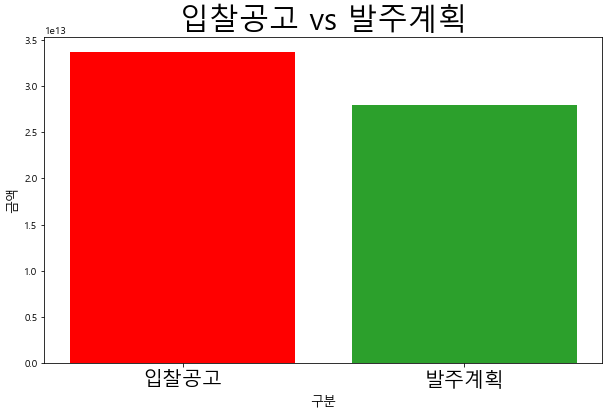

In [242]:
#notice_reduce.rename(columns={'공고게시일자':'게시일자'})
plan_reduce["공통"]=None
notice_reduce["공통"]=None

plan_reduce.sort_values(by="발주계획통합번호")
notice_reduce.sort_values(by="발주계획통합번호")
a=notice_reduce.배정예산.sum()
b=plan_reduce.발주금액.sum()

ab = [a,b]
#ab_name = ["입찰공고","발주계획"]
plt.bar([0,1],ab,color=['r','C2'])
plt.title("입찰공고 vs 발주계획",fontsize=30)
plt.xticks(np.arange(2),labels= ["입찰공고","발주계획"],fontsize=20)
plt.xlabel("구분",fontsize=13)
plt.ylabel("금액",fontsize=13)
plt.show()

In [128]:
plan_reduce_arr=plan_reduce.발주계획통합번호.tolist()
notice_reduce_arr=notice_reduce.발주계획통합번호.tolist()
col_p = ["plan"]
col_n = ["notice"]

In [147]:
plan_df=pd.DataFrame(data=plan_reduce_arr,columns=col_p)
notice_df =pd.DataFrame(data=notice_reduce_arr,columns=col_n)
full_df=pd.concat([plan_df, notice_df], axis = 1)
full_df

,plan,notice
0,5-1-2017-7490211-000001,5-1-2017-D150099-000033
1,5-1-2017-7121122-000002,5-1-2017-6420000-000489
2,5-1-2017-7121122-000003,5-1-2017-5310000-000046
3,5-1-2017-4040179-000004,5-1-2017-4530000-000106
4,5-1-2017-5450000-000002,5-1-2017-Z010533-000009
...,...,...
144417,NaN,5-1-2017-3030000-000039
144418,NaN,5-1-2017-3030000-000039
144419,NaN,5-1-2017-1430000-000129
144420,NaN,5-1-2017-Z031193-000002


In [158]:
plan_count=full_df.plan.count()
notice_count=full_df.notice.count()
r = plan_count - notice_count
print("발주계획내역:%d"%plan_count)
print("입찰공고내역:%d"%notice_count)
print("발주계획내역과 입찰공고내역의 차이:%d"%r)

발주계획내역:123290
입찰공고내역:118850
발주계획내역과 입찰공고내역의 차이:4440


In [11]:
notice_set = notice_reduce[['발주계획통합번호','배정예산']]
plan_set = plan_reduce[['발주계획통합번호','발주금액']]

In [161]:
total_set=pd.merge(notice_set, plan_set)
total_set
print("발주계획내역, 입찰공고내역 공통 개수:",len(total_set))

발주계획내역, 입찰공고내역 공통 개수: 116161


## 용역발주계획내역:발주금액 == 용역입찰공고내역:배정예산




# 발주계획 -> 입찰공고 비율 : 0.93 

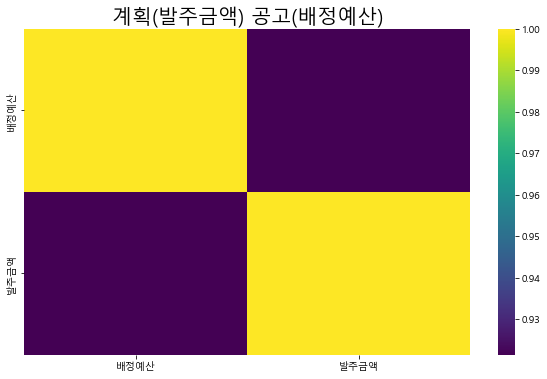

In [234]:
corr=total_set.corr()
import seaborn as sns
sns.heatmap(corr, cmap='viridis')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title("계획(발주금액) 공고(배정예산)",fontsize=20)
plt.show()

In [1]:
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #교차검증
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [ ]:

x,y = boston.data, boston.target
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.15)
print("boston:",boston.data.shape) 
print("xtrain:",xtrain.data.shape) # 학습에 투입시킬 데이터 (행,열)
print("ytrain:",ytrain.data.shape) # 학습에 투입시킬 데이터 (행)
print("xtest:",xtest.data.shape) # 테스트용 데이터 (행,열)
print("ytest:",ytest.data.shape) # 테스트용 데이터 (행)